# Conjunto de Datos de Acciones de la BMV

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

%matplotlib inline

test_partition_size = 0.4

In [195]:
df = pd.read_csv('acciones-mx_Watchlist_27032020.csv')
df.shape

(503, 39)

In [196]:
df.head()

,nombre,simbolo,mercado,ultimo,compra,venta,horario_ampliado,horario_ampliado_%,apertura,anterior,maximo,minimo,var,%_var,vol,fecha_prox_resultados,hora,cap_mercado,ganancia,vol_promedio_3m,bpa,per,beta,dividendo,rendimiento,5_minutos,15_minutos,30_minutos,1_hora,5_horas,diario,semanal,mensual,diario.1,semanal.1,mensual.1,anual,1_anio,3_anios
0,Commerzbank AG,CBKN.MX,MX,180.580,-,-,--,--,180.580,180.580,180.580,180.580,0.0,0.00%,-,13.05.2020,04/02,"116,120,000,000",NaN,"2,004",-,-,-,-,-,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00%,-0.00%,-0.00%,-0.00%,-0.00%,16.50%
1,BT Group PLC ADR,BTN.MX,MX,191.600,-,-,--,--,191.600,245.000,191.600,191.600,0.0,0.00%,-,07.05.2020,04/02,"342,040,000,000",NaN,"2,000",-,-,-,-,-,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00%,-0.00%,-0.00%,-0.00%,-32.32%,-49.97%
2,Topbuild Corp,BLD.MX,MX,"2,090.000",-,-,--,--,"2,128.000","2,319.000","2,128.000","2,090.000",0.0,0.00%,-,12.05.2020,25/02,"63,110,000,000",NaN,"1,448",-,-,-,-,-,Venta,Venta,Venta fuerte,Neutral,Compra fuerte,Compra fuerte,Compra fuerte,Compra fuerte,0.00%,0.00%,0.00%,7.01%,65.87%,138.23%
3,Aggreko,AGKN.MX,MX,214.150,-,-,--,--,214.150,206.780,214.150,214.150,0.0,+0.00%,-,06.08.2020,04/02,79.14T,NaN,"26,450",-,-,-,-,-,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00%,0.00%,0.00%,0.00%,0.00%,-1.65%
4,Aluminum Corp of China Ltd ADR,ACHN.MX,MX,138.990,-,-,--,--,137.500,158.000,138.990,137.500,0.0,+0.00%,-,26.03.2020,12/02,"162,790,000,000","4,250,000,000",183,-,-,-,-,-,Compra,Compra fuerte,Compra,Venta fuerte,Venta fuerte,Venta fuerte,Venta fuerte,Venta fuerte,0.00%,-0.00%,-0.00%,-12.03%,-24.46%,-41.40%


In [197]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 503 entries, 0 to 502
Data columns (total 39 columns):
nombre                   503 non-null object
simbolo                  503 non-null object
mercado                  503 non-null object
ultimo                   503 non-null object
compra                   503 non-null object
venta                    503 non-null object
horario_ampliado         503 non-null object
horario_ampliado_%       503 non-null object
apertura                 503 non-null object
anterior                 503 non-null object
maximo                   503 non-null object
minimo                   503 non-null object
var                      503 non-null float64
%_var                    503 non-null object
vol                      503 non-null object
fecha_prox_resultados    503 non-null object
hora                     503 non-null object
cap_mercado              503 non-null object
ganancia                 198 non-null object
vol_promedio_3m          503 non-null o

# Preprocesamiento de Datos, Extracción y Selección de Características

In [198]:
df.columns

Index(['nombre', 'simbolo', 'mercado', 'ultimo', 'compra', 'venta',
       'horario_ampliado', 'horario_ampliado_%', 'apertura', 'anterior',
       'maximo', 'minimo', 'var', '%_var', 'vol', 'fecha_prox_resultados',
       'hora', 'cap_mercado', 'ganancia', 'vol_promedio_3m', 'bpa', 'per',
       'beta', 'dividendo', 'rendimiento', '5_minutos', '15_minutos',
       '30_minutos', '1_hora', '5_horas', 'diario', 'semanal', 'mensual',
       'diario.1', 'semanal.1', 'mensual.1', 'anual', '1_anio', '3_anios'],
      dtype='object')

In [0]:
df_pre = df.drop(['mercado', 'ultimo', 'compra', 'venta',
       'horario_ampliado', 'horario_ampliado_%', 'apertura', 'anterior',
       'maximo', 'minimo', 'var', '%_var', 'vol', 'fecha_prox_resultados',
       'hora', 'cap_mercado', 'ganancia', 'vol_promedio_3m', 'bpa', 'per',
       'beta', 'dividendo', 'rendimiento', '5_minutos', '15_minutos',
       '30_minutos', '1_hora', '5_horas', 'diario', 'semanal', '1_anio', '3_anios'], axis=1)

In [200]:
df_pre.head()

,nombre,simbolo,mensual,diario.1,semanal.1,mensual.1,anual
0,Commerzbank AG,CBKN.MX,NaN,0.00%,-0.00%,-0.00%,-0.00%
1,BT Group PLC ADR,BTN.MX,NaN,0.00%,-0.00%,-0.00%,-0.00%
2,Topbuild Corp,BLD.MX,Compra fuerte,0.00%,0.00%,0.00%,7.01%
3,Aggreko,AGKN.MX,NaN,0.00%,0.00%,0.00%,0.00%
4,Aluminum Corp of China Ltd ADR,ACHN.MX,Venta fuerte,0.00%,-0.00%,-0.00%,-12.03%


In [0]:
df_pre['diario.1'] = df_pre['diario.1'].replace({'%':''}, regex=True)
df_pre['semanal.1'] = df_pre['semanal.1'].replace({'%':''}, regex=True)
df_pre['mensual.1'] = df_pre['mensual.1'].replace({'%':''}, regex=True)
df_pre['anual'] = df_pre['anual'].replace({'%':''}, regex=True)

In [202]:
df_pre.head()

,nombre,simbolo,mensual,diario.1,semanal.1,mensual.1,anual
0,Commerzbank AG,CBKN.MX,NaN,0.00,-0.00,-0.00,-0.00
1,BT Group PLC ADR,BTN.MX,NaN,0.00,-0.00,-0.00,-0.00
2,Topbuild Corp,BLD.MX,Compra fuerte,0.00,0.00,0.00,7.01
3,Aggreko,AGKN.MX,NaN,0.00,0.00,0.00,0.00
4,Aluminum Corp of China Ltd ADR,ACHN.MX,Venta fuerte,0.00,-0.00,-0.00,-12.03


In [203]:
# Se eliminan las muestras que no tienen dato de supervisión
df_pre = df_pre.dropna(axis=0, how='any', thresh=None, subset=['mensual'], inplace=False)
df_pre.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 442 entries, 2 to 502
Data columns (total 7 columns):
nombre       442 non-null object
simbolo      442 non-null object
mensual      442 non-null object
diario.1     442 non-null object
semanal.1    442 non-null object
mensual.1    442 non-null object
anual        442 non-null object
dtypes: object(7)
memory usage: 27.6+ KB


In [0]:
df_pre['diario.1'] = df_pre['diario.1'].astype(float)
df_pre['semanal.1'] = df_pre['semanal.1'].astype(float)
df_pre['mensual.1'] = df_pre['mensual.1'].astype(float)
df_pre['anual'] = df_pre['anual'].astype(float)

In [205]:
df_pre.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 442 entries, 2 to 502
Data columns (total 7 columns):
nombre       442 non-null object
simbolo      442 non-null object
mensual      442 non-null object
diario.1     442 non-null float64
semanal.1    442 non-null float64
mensual.1    442 non-null float64
anual        442 non-null float64
dtypes: float64(4), object(3)
memory usage: 27.6+ KB


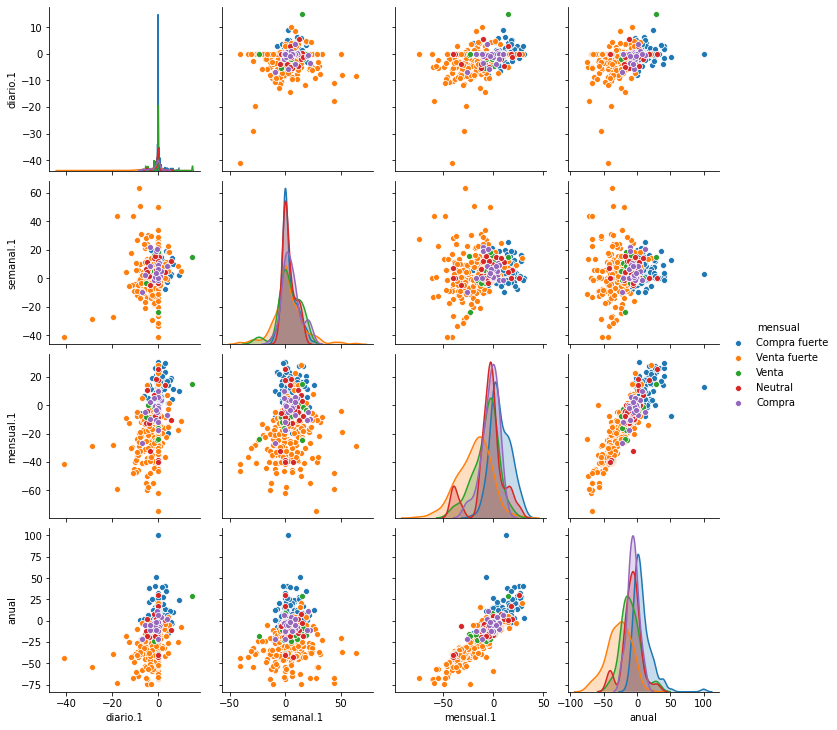

In [206]:
sns.pairplot(df_pre, hue="mensual")

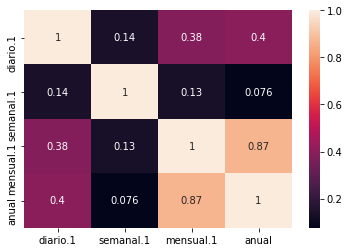

In [207]:
sns.heatmap(df_pre.corr(), annot = True)

In [208]:
df_pre.corr()

,diario.1,semanal.1,mensual.1,anual
diario.1,1.000000,0.137379,0.383480,0.396221
semanal.1,0.137379,1.000000,0.134178,0.075948
mensual.1,0.383480,0.134178,1.000000,0.868119
anual,0.396221,0.075948,0.868119,1.000000


# Estandarización de Datos

In [0]:
from sklearn.preprocessing import StandardScaler

In [210]:
scaler = StandardScaler()
scaler.fit(df_pre.drop(['nombre','simbolo','mensual'], axis=1))

StandardScaler(copy=True, with_mean=True, with_std=True)

In [0]:
scaled_features = scaler.transform(df_pre.drop(['nombre','simbolo','mensual'], axis=1))
# Se renombran las columnas
df_features = pd.DataFrame(scaled_features, columns=['diario','semanal','mensual','anual'])

In [212]:
df_features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 442 entries, 0 to 441
Data columns (total 4 columns):
diario     442 non-null float64
semanal    442 non-null float64
mensual    442 non-null float64
anual      442 non-null float64
dtypes: float64(4)
memory usage: 13.9 KB


# Creación de Modelos (Vistos en Clase)
## 1. Regresión Logística Multiclase

In [0]:
# Partición de datos para entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(df_features, df_pre['mensual'], test_size=test_partition_size, random_state=101)

In [214]:
# Creación del modelo de regresión logística
from sklearn.linear_model import LogisticRegression

logistic_regression = LogisticRegression(max_iter = 1000, multi_class='auto', solver='lbfgs')
logistic_regression.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

### 1.1. Evaluación del modelo
#### 1.1.1. Reporte de Clasificación

In [215]:
y_pred = logistic_regression.predict(X_test)
print(classification_report(y_test, y_pred))

               precision    recall  f1-score   support

       Compra       0.00      0.00      0.00         8
Compra fuerte       0.63      0.92      0.75        53
      Neutral       0.00      0.00      0.00        11
        Venta       0.00      0.00      0.00         8
 Venta fuerte       0.86      0.88      0.87        97

     accuracy                           0.76       177
    macro avg       0.30      0.36      0.32       177
 weighted avg       0.66      0.76      0.70       177



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


#### 1.1.2. Matriz de Confusión 

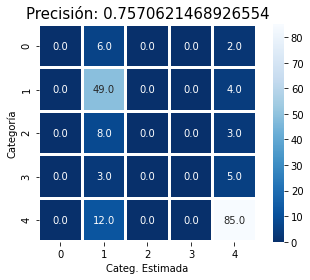

In [216]:
cm = confusion_matrix(y_test, y_pred)
score = logistic_regression.score(X_test, y_test)

sns.heatmap(cm, annot=True, fmt=".1f", linewidths=2, square = True, cmap = 'Blues_r');
plt.ylabel('Categoría');
plt.xlabel('Categ. Estimada');
all_sample_title = 'Precisión: {0}'.format(score)
plt.title(all_sample_title, size = 15);

## 2. Máquinas de Soporte Vectorial

In [0]:
# Partición de datos para entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(df_features, df_pre['mensual'], test_size=test_partition_size, random_state=101)

In [0]:
from sklearn import svm

In [219]:
svm_model = svm.SVC(kernel='rbf')
svm_model.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

### 2.1. Evaluación de Modelo
#### 2.1.1. Reporte de Clasificación

In [220]:
y_pred = svm_model.predict(X_test)
print(classification_report(y_test, y_pred))

               precision    recall  f1-score   support

       Compra       0.00      0.00      0.00         8
Compra fuerte       0.61      0.96      0.74        53
      Neutral       0.00      0.00      0.00        11
        Venta       0.00      0.00      0.00         8
 Venta fuerte       0.87      0.84      0.85        97

     accuracy                           0.75       177
    macro avg       0.30      0.36      0.32       177
 weighted avg       0.66      0.75      0.69       177



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


#### 2.1.2. Matriz de Confusión

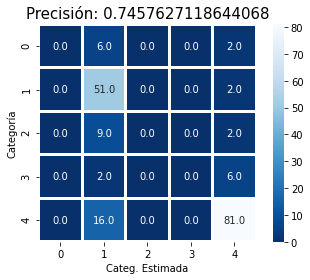

In [221]:
cm = confusion_matrix(y_test, y_pred)
score = svm_model.score(X_test, y_test)

sns.heatmap(cm, annot=True, fmt=".1f", linewidths=2, square = True, cmap = 'Blues_r');
plt.ylabel('Categoría');
plt.xlabel('Categ. Estimada');
all_sample_title = 'Precisión: {0}'.format(score)
plt.title(all_sample_title, size = 15);

# Creación de Modelos (Investigados)

## 3. Gaussian Process Classifier (GPC)

In [0]:
# Partición de datos para entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(df_features, df_pre['mensual'], test_size=test_partition_size, random_state=101)

In [0]:
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF

In [224]:
gpc_kernel = 1.0 * RBF(1.0)
gpc_model = GaussianProcessClassifier(kernel=gpc_kernel, random_state=101)
gpc_model.fit(X_train, y_train)

GaussianProcessClassifier(copy_X_train=True, kernel=1**2 * RBF(length_scale=1),
                          max_iter_predict=100, multi_class='one_vs_rest',
                          n_jobs=None, n_restarts_optimizer=0,
                          optimizer='fmin_l_bfgs_b', random_state=101,
                          warm_start=False)

### 3.1. Evaluación de Modelo
#### 3.1.1. Reporte de Clasificación

In [225]:
y_pred = gpc_model.predict(X_test)
print(classification_report(y_test, y_pred))

               precision    recall  f1-score   support

       Compra       0.00      0.00      0.00         8
Compra fuerte       0.62      0.94      0.75        53
      Neutral       0.00      0.00      0.00        11
        Venta       0.00      0.00      0.00         8
 Venta fuerte       0.88      0.87      0.87        97

     accuracy                           0.76       177
    macro avg       0.30      0.36      0.32       177
 weighted avg       0.66      0.76      0.70       177



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


#### 3.1.2. Matriz de Confusión

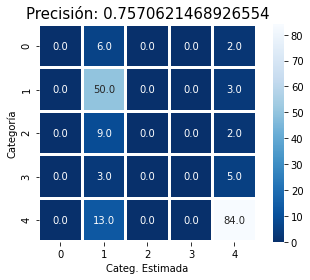

In [226]:
cm = confusion_matrix(y_test, y_pred)
score = gpc_model.score(X_test, y_test)

sns.heatmap(cm, annot=True, fmt=".1f", linewidths=2, square = True, cmap = 'Blues_r');
plt.ylabel('Categoría');
plt.xlabel('Categ. Estimada');
all_sample_title = 'Precisión: {0}'.format(score)
plt.title(all_sample_title, size = 15);

## 4. K Nearest Neighbors Classifier

In [0]:
# Partición de datos para entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(df_features, df_pre['mensual'], test_size=test_partition_size, random_state=101)

In [0]:
from sklearn.neighbors import KNeighborsClassifier

In [229]:
knn_model = KNeighborsClassifier(n_neighbors=1)
knn_model.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')

### 4.1. Evaluación de Modelo
#### 4.1.1. Reporte de Clasificación

In [230]:
y_pred = knn_model.predict(X_test)
print(classification_report(y_test, y_pred))

               precision    recall  f1-score   support

       Compra       0.12      0.12      0.12         8
Compra fuerte       0.61      0.66      0.64        53
      Neutral       0.06      0.09      0.07        11
        Venta       0.00      0.00      0.00         8
 Venta fuerte       0.88      0.76      0.82        97

     accuracy                           0.63       177
    macro avg       0.34      0.33      0.33       177
 weighted avg       0.68      0.63      0.65       177



#### 4.1.2. Matriz de Confusión

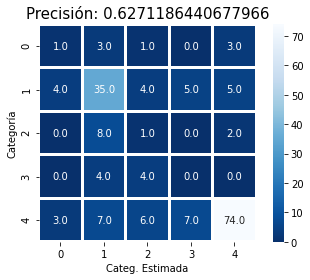

In [231]:
cm = confusion_matrix(y_test, y_pred)
score = knn_model.score(X_test, y_test)

sns.heatmap(cm, annot=True, fmt=".1f", linewidths=2, square = True, cmap = 'Blues_r');
plt.ylabel('Categoría');
plt.xlabel('Categ. Estimada');
all_sample_title = 'Precisión: {0}'.format(score)
plt.title(all_sample_title, size = 15);

## 5. K Nearest Neighbors Classifier variando n_neighbors

In [0]:
# Elbow Method: variación de n_neighbors encontrando una disminución drástica del error
error_rate = []
for i in range(1, 40):
    knn_model = KNeighborsClassifier(n_neighbors=i)
    knn_model.fit(X_train, y_train)
    y_pred_i = knn_model.predict(X_test)
    error_rate.append(np.mean(y_pred_i != y_test))

Text(0, 0.5, 'Error')

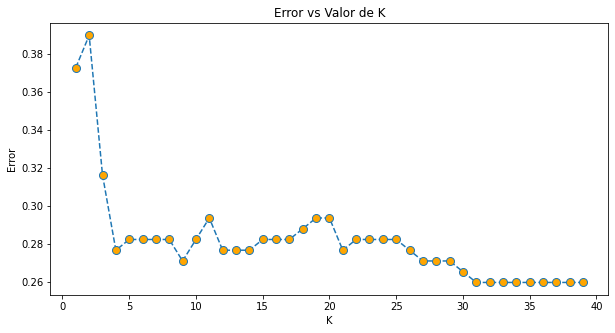

In [233]:
plt.figure(figsize=(10, 5))
plt.plot(range(1, 40), error_rate, linestyle='dashed', marker='o', markerfacecolor='orange', markersize=8)
plt.title('Error vs Valor de K')
plt.xlabel('K')
plt.ylabel('Error')

#### 5.1.1. Reporte de Clasificación

In [238]:
knn_model = KNeighborsClassifier(n_neighbors=31)
knn_model.fit(X_train, y_train)

y_pred = knn_model.predict(X_test)
print(classification_report(y_test, y_pred))

               precision    recall  f1-score   support

       Compra       0.00      0.00      0.00         8
Compra fuerte       0.57      0.96      0.72        53
      Neutral       0.00      0.00      0.00        11
        Venta       0.00      0.00      0.00         8
 Venta fuerte       0.91      0.82      0.86        97

     accuracy                           0.74       177
    macro avg       0.30      0.36      0.32       177
 weighted avg       0.67      0.74      0.69       177



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


#### 5.1.2 Matriz de Confusión

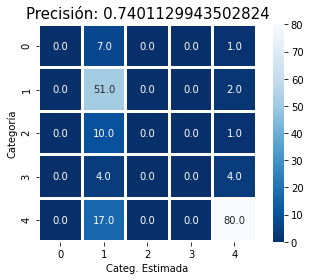

In [239]:
cm = confusion_matrix(y_test, y_pred)
score = knn_model.score(X_test, y_test)

sns.heatmap(cm, annot=True, fmt=".1f", linewidths=2, square = True, cmap = 'Blues_r');
plt.ylabel('Categoría');
plt.xlabel('Categ. Estimada');
all_sample_title = 'Precisión: {0}'.format(score)
plt.title(all_sample_title, size = 15);